In [1]:
import numpy as np
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, SparsePCA
import matplotlib.pyplot as plt

def load_eigs_npz(filename='results/results-L-2-W-0.1-seed-0.npz'):
    data = np.load(filename)
    eigvals = data[data.files[0]]
    eigvecs = data[data.files[1]]

    return eigvals, eigvecs.T

def get_filenames(Ls, 
                ws = [0.3, 0.6, 0.8999999999999999, 1.2,  1.5, 1.8,
                      2.0999999999999996, 2.4, 2.6999999999999997, 
                      2.9999999999999996, 3.3, 3.5999999999999996, 
                      3.8999999999999995, 4.2, 4.5, 4.8, 5.1, 
                      5.3999999999999995, 5.699999999999999, 6.0],
                num_seeds = 60, start_seed=0):
    Files = []
    

    seeds = np.arange(start_seed,start_seed+num_seeds,1)
    for L in Ls:
        for w in ws:
            files = []
            for seed in seeds:
                file = '/Users/antongolles/results1/results-L-{}-W-{}-seed-{}.npz'.format(L,w,seed)
                files.append(file)
            Files.append(files)
    return Files

def get_eigvecs(Files, flatten=True):
    data = []
    for files in Files:
        for file in files:
            eigvals, eigvecs = load_eigs_npz(file)
            if flatten == True:
                data.append(eigvecs.flatten())
            else:
                data.append(eigvecs)
    #print(np.shape(data))
    return np.array(data)


In [ ]:
np.load('initial_results/10_20.npy')

In [3]:
num_seeds = 10

data = []
L = 12
for start_seed in np.arange(0,1000,num_seeds):
    
    filename = 'initial_results/L_{}_seeds{}_{}.npy'.format(L, start_seed, start_seed+10)
    one_file = np.load(filename)
    data.append(one_file)
    
data = np.array(data)



In [4]:
avgs = np.mean(data, axis=0)
np.shape(data), np.shape(avgs)
avgs.T
avg_with_0_1 = np.vstack([np.ones(20), avgs.T, np.zeros(20)])
avg_with_0_1

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.99487294, 0.99403227, 0.99258779, 0.99117166, 0.99038749,
        0.99037124, 0.99086686, 0.99158027, 0.9923364 , 0.99303333,
        0.99365351, 0.99418043, 0.99464631, 0.99504109, 0.99538286,
        0.99568038, 0.99593653, 0.99616481, 0.99636302, 0.9965446 ],
       [0.66161239, 0.67528359, 0.69973613, 0.73500975, 0.77886046,
        0.82340819, 0.8617312 , 0.89161799, 0.91392894, 0.93035597,
        0.94242434, 0.95135705, 0.95817959, 0.96346611, 0.96762221,
        0.97095052, 0.97366928, 0.97592612, 0.97782684, 0.97945597],
       [0.52076692, 0.52507045, 0.53380063, 0.54904405, 0.57372146,
        0.60960534, 0.65363388, 0.69972139, 0.74302973, 0.78087552,
        0.81258925, 0.83848314, 0.85960986, 0

In [6]:
ws = [0.3, 0.6, 0.8999999999999999, 1.2,  1.5, 1.8,
                      2.0999999999999996, 2.4, 2.6999999999999997, 
                      2.9999999999999996, 3.3, 3.5999999999999996, 
                      3.8999999999999995, 4.2, 4.5, 4.8, 5.1, 
                      5.3999999999999995, 5.699999999999999, 6.0]

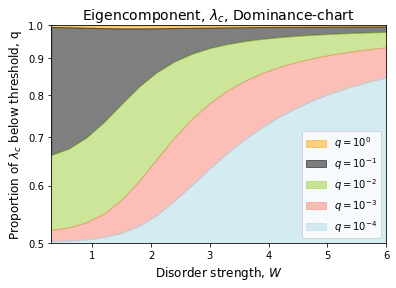

In [26]:

# plt stacked lines
colors = 'orange, lightblue, salmon, yellowgreen, black, orange'.split(', ')[::-1]
i = 1
for i, color in zip(range(len(avg_with_0_1)-1),colors):
    a = i*(-1)
    plt.fill_between(ws, avg_with_0_1[i], avg_with_0_1[i+1], 
                        label='$q=10^{}$'.format({a}),
                       color=color, alpha=.5)
    
        
plt.legend(loc='lower right')
plt.yscale('log')
plt.yticks(np.arange(0.5,1.1,0.1), [0.5,0.6,0.7,0.8,0.9,1.0])
plt.xlim(min(ws), max(ws))
plt.ylim(0.5, 1)

plt.xlabel('Disorder strength, $W$', fontsize=12)
plt.ylabel('Proportion of $\lambda_c$ below threshold, q', fontsize=12)
plt.title('Eigencomponent, $\lambda_c$, Dominance-chart', fontsize=14)

plt.savefig('figures/Domination-chart.png', dpi=500, bbox_inches='tight')

In [16]:
# Get maxes
def get_maxs(L = 8, num_seeds = 10,
             ws = [0.3, 0.6, 0.8999999999999999, 1.2,  1.5, 1.8,
                      2.0999999999999996, 2.4, 2.6999999999999997, 
                      2.9999999999999996, 3.3, 3.5999999999999996, 
                      3.8999999999999995, 4.2, 4.5, 4.8, 5.1, 
                      5.3999999999999995, 5.699999999999999, 6.0],
             
            ):
    Maxs = []

    for w in tqdm(ws):    
        Files = get_filenames([L], ws=[w], num_seeds=num_seeds, start_seed=0)
        data = get_eigvecs(Files)
        maxs = np.max(abs(data), axis=1)
        Maxs.append(maxs)

    return np.array(Maxs)

Maxs = get_maxs(num_seeds=num_seeds)

Maxs_avg = np.mean(Maxs, axis=1)

100%|██████████| 20/20 [01:03<00:00,  3.16s/it]


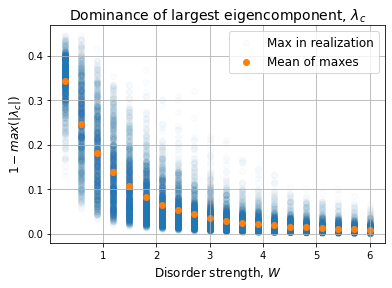

In [28]:
num_seeds = 1000

Ws = sorted(ws*num_seeds)

plt.scatter(Ws, np.ones(np.shape(Maxs))-Maxs, alpha=.02 , label='Max in realization')
plt.scatter(ws, np.ones(np.shape(Maxs_avg))-Maxs_avg, label = 'Mean of maxes')
plt.xlabel('Disorder strength, $W$', fontsize=12)
plt.ylabel('$1-max(|\lambda_c|)$', fontsize=12)
plt.title('Dominance of largest eigencomponent, $\lambda_c$', fontsize=14)

plt.legend(fontsize=12)

plt.grid()
plt.savefig('figures/Domination-chart2.png', dpi=500, bbox_inches='tight')

In [30]:
np.shape(data)

(100, 20, 4)

In [3]:
import numpy as np
np.load('/Users/antongolles/results1/results-L-12-W-1.0-seed-0.npz')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/antongolles/results1/results-L-12-W-1.0-seed-0.npz'

_ I wonder which plot better invites a notion/intuition of a phase transition...


This report looks at how we


In regards to Intrinsic dimension, i want to formulate expectations (even though they may have been established long after initialliy being introduced to the subject, I suppose their value none the less). I had the following thought when presenting for the professors. 


In the thermalized phase, I suppose that many quantum states should be partially filled by numerous particles in the system, i.e. covered by the wavefunction of numerous particles. As such, a full representation of this system would be a matrix of size $L^2$. I would ecpect that this quantity should upper bound the intrinsic dimensionality.

For the localized phase where particles are firmly lodged in their respective quantum states, a list would be sufficient to describe the system. We expect this should lower bound our intrinsic dim.

So in short, what we are say; is that we should see the most efficient representation, as expressed by intrinsic dimensionality; go from a rank-1 tensor to a rank-2 tensor.